In [1]:
# In this notebook, we want to use the skills extracted to predict the job title and recommend jobs

In [81]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#NLP data packages
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

In [82]:
df = pd.read_csv("tokenized skills.csv")

In [83]:
df.dtypes

job_title           object
company_name        object
job_description     object
job_title_1         object
company_location    object
desc_tokenized      object
skill               object
dtype: object

In [84]:
#number of rows (datapoints)
len(df)

1771

In [85]:
len(set(df['job_title_1'].values))

9

<AxesSubplot:>

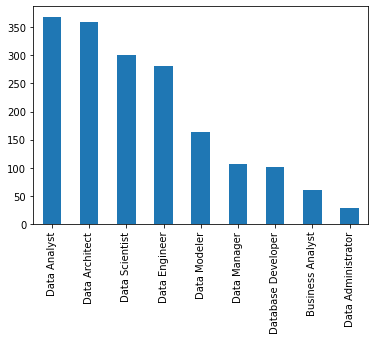

In [86]:
df['job_title_1'].value_counts().plot(kind='bar')

In [87]:
# remove the list bracket
df['skill'] = df['skill'].str.strip('[]')


In [88]:
df['skill'] 

0       'infrastructure', 'net', 'software', 'innovati...
1       'reporting', 'data engineering', 'collection',...
2       'reporting', 'data engineering', 'collection',...
3       'data integration', 'data mining', 'analytics'...
4       'python', 'software development', 'software', ...
                              ...                        
1766    'database', 'office', 'analytics', 'project ma...
1767    'database administrator', 'retail', 'finance',...
1768    'database', 'office', 'analytics', 'project ma...
1769    'sql', 'dba', 'sql', 'dba', 'power management'...
1770    'database administrator', 'database administra...
Name: skill, Length: 1771, dtype: object

In [63]:
# Stratify split the training, and testing set into 
docs_train, docs_test, y_train, y_test = train_test_split(df["skill"].values, 
                                                          df["job_title_1"].values,
                                                          stratify=df["job_title_1"], 
                                                          test_size=0.2, random_state=7)

In [94]:
docs_train

array(["'data warehouse', 'reference data', 'integration', 'project governance', 'designing', 'data modelling', 'sap', 'microsoft azure', 'spaces', 'office'",
       "'reporting', 'data architect', 'finance', 'financial services', 'finance', 'finance', 'finance', 'sme', 'integration', 'cloud', 'data platforms', 'snowflake', 'strategy', 'agile', 'business requirements', 'conceptual design', 'data modelling tools', 'cloud', 't sql', 'data engineering', 'data architect', 'data modelling', 'design', 'data engineering', 'reporting', 'metrics', 'fit', 'reach', 'co'",
       "'innovation', 'controls', 'data management', 'data domain', 'transformation', 'leadership', 'interpersonal skills', 'adapt to fast pace changing circumstances', 'system optimisation', 'system implementation', 'data management', 'strategy', 'emerging technologies', 'database', 'data mapping', 'analytics', 'cdd', 'screening', 'implementation', 'governance', 'shared services', 'senior management', 'mi', 'analytics', 'negoti

In [143]:
y_train

array(['Data Analyst', 'Data Scientist', 'Data Architect', ...,
       'Data Analyst', 'Data Scientist', 'Data Architect'], dtype=object)

In [96]:
df["skill"].values

array(["'infrastructure', 'net', 'software', 'innovation', 'innovate', 'nat', 'deep learning', 'ds', 'sit', 'software', 'make real changes', 'python', 'docker', 'etl', 'software engineering experience', 'etl', 'data processing', 'pandas', 'numpy', 'automation', 'github', 'scale', 'postgre sql', 'databases', 'relational databases', 'infrastructure', 'automation', 'office', 'software engineering experience', 'office', 'office'",
       "'reporting', 'data engineering', 'collection', 'reporting', 'databases', 'infrastructure', 'data platform experience', 'python', 'posix', 'unix', 'linux', 'ecosystem', 'sql', 'relational databases', 'data warehouse', 'code development', 'continuous integration', 'typescript', 'react', 'ui', 'hadoop', 'ecosystem', 'java', 'spark', 'programming', 'cloud platform', 'snowflake', 'php', 'manage multiple priorities'",
       "'reporting', 'data engineering', 'collection', 'reporting', 'databases', 'infrastructure', 'data platform experience', 'python', 'posix',

In [64]:
print(f"{len(docs_train)} train and {len(docs_test)} test instances")

1416 train and 355 test instances


In [65]:
count_vectorizer = CountVectorizer(
    tokenizer=None,        # None - use the default tokenizer
    ngram_range=(1,1),     # min and max range of ngrams
    analyzer="word",       # split the document into words, rather than e.g. characters
    max_df=1.0,            # ignore words with df greater than the value (int represents count, 
                           # float represents proportion of documents)
    min_df=0.007           # ignore words the df lower than the value (int represents count, 
                           # float represents proportion)
)

In [66]:
# create a document-by-word matrix for training data
# <<< solution
docs_train_counts = count_vectorizer.fit_transform(docs_train)
# >>>

In [67]:
docs_train_counts.shape

(1416, 632)

In [68]:
# create a document-by-word matrix for test data
# <<< solution
docs_test_counts = count_vectorizer.transform(docs_test)
# >>>

In [69]:
# transform word counts in each document to TFIDF weights
# <<< solution
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

# fit and transform the training set with "fit_transform()"
docs_train_tfidf = tfidf_transformer.fit_transform(docs_train_counts)

# transform test
docs_test_tfidf = tfidf_transformer.transform(docs_test_counts)
# >>>

In [70]:
# scale the data with MaxAbsScaler

# <<< solution
from sklearn.preprocessing import MaxAbsScaler 

scaler = MaxAbsScaler()

X_train = scaler.fit_transform(docs_train_tfidf)
X_test = scaler.transform(docs_test_tfidf)
# >>>


# Cosine Similarity

In [133]:
count_matrix = count_vectorizer.fit_transform(df['skill'])
tfidf_matrix = tfidf_transformer.fit_transform(count_matrix)
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)

In [152]:
## Finding the index of the job that we want to match.
def get_index(title):
    return final_data[df["job_title_1"] == title].index.values[0]
    
title = get_index(df["job_title_1"][700])


In [153]:
df["job_title_1"][700]

'Data Architect'

In [154]:
## Creating a list with similarily of our CV with the job description
similar_jobs = list(enumerate(cosine_sim[title]))

## Sort the list in descending order
sorted_similar_jobs = sorted(similar_jobs, key=lambda x:x[1], reverse=True)
sorted_similar_jobs

[(497, 0.9999999999999998),
 (561, 0.9999999999999998),
 (581, 0.9999999999999998),
 (626, 0.9999999999999998),
 (652, 0.9999999999999998),
 (718, 0.9999999999999998),
 (3, 0.4196595819591194),
 (1242, 0.4196595819591194),
 (1178, 0.4082225132115565),
 (513, 0.4044199486120814),
 (574, 0.3772853569167322),
 (607, 0.3746884996568903),
 (479, 0.31866682925060863),
 (493, 0.31866682925060863),
 (505, 0.31866682925060863),
 (544, 0.31866682925060863),
 (554, 0.31866682925060863),
 (571, 0.31866682925060863),
 (580, 0.31866682925060863),
 (624, 0.31866682925060863),
 (633, 0.31866682925060863),
 (645, 0.31866682925060863),
 (665, 0.31866682925060863),
 (698, 0.31866682925060863),
 (8, 0.3177637722116549),
 (109, 0.3177637722116549),
 (106, 0.3075602655249637),
 (1333, 0.3075602655249637),
 (758, 0.2927069608972752),
 (808, 0.2927069608972752),
 (816, 0.2927069608972752),
 (485, 0.29252389752328106),
 (546, 0.29252389752328106),
 (559, 0.29252389752328106),
 (642, 0.29252389752328106),
 (706

In [155]:
## Printing some jobs that are fitting better to your CV
pd.options.display.max_colwidth = 1000

def get_title(index):
    return df[df.index == index]["job_title_1"]
i=0
for job in sorted_similar_jobs:
    print(get_title(job[0]))
    i=i+1
    if i>5:
        break

497    Data Analyst
Name: job_title_1, dtype: object
561    Data Architect
Name: job_title_1, dtype: object
581    Data Architect
Name: job_title_1, dtype: object
626    Data Architect
Name: job_title_1, dtype: object
652    Data Architect
Name: job_title_1, dtype: object
718    Data Architect
Name: job_title_1, dtype: object


In [159]:
df.iloc[[700]]

,job_title,company_name,job_description,job_title_1,company_location,desc_tokenized,skill
700,Architect,Bumble,data architect bi operations we strongly encourage people of colour lesbian gay bisexual transgender queer and non binary people veterans parents and individuals with disabilities to apply bumble is an equal opportunity employer and welcomes everyone to our team if you need reasonable adjustments at any point in the application or interview process please let us know in your application please feel free to note which pronouns you use for example she her hers he him his they them theirs etc what does a data solutions architect do within bumble you will lead all enterprise data architecture across the business primarily working with the bi team where most of our data is utilised daily you will work in one of the most complex fast paced varied and voluminous data environments in the tech world s billions of data points every day across multiple source systems multiple data science and analytics methodologies you get to collaborate with all busines...,Data Architect,"London, England, United Kingdom","['data', 'architect', 'operation', 'strongly', 'encourage', 'people', 'colour', 'lesbian', 'bisexual', 'transgender', 'queer', 'binary', 'people', 'veteran', 'parent', 'individual', 'disability', 'apply', 'bumble', 'equal', 'opportunity', 'employer', 'welcome', 'everyone', 'team', 'need', 'reasonable', 'adjustment', 'point', 'application', 'interview', 'process', 'please', 'know', 'application', 'please', 'feel', 'free', 'note', 'pronoun', 'example', 'data', 'solution', 'architect', 'within', 'bumble', 'lead', 'enterprise', 'data', 'architecture', 'across', 'business', 'primarily', 'working', 'team', 'data', 'utilised', 'daily', 'work', 'complex', 'fast', 'paced', 'varied', 'voluminous', 'data', 'environment', 'tech', 'world', 'billion', 'data', 'point', 'every', 'across', 'multiple', 'source', 'system', 'multiple', 'data', 'science', 'analytics', 'methodology', 'collaborate', 'business', 'area', 'engineering', 'product', 'data', 'learn', 'everything', 'bumble', 'seen', 'subject', ...","'data architect', 'data architecture', 'analytics', 'machine learning', 'impact', 'safe', 'focus', 'budget', 'jd', 'data architecture', 'documentation', 'snowflake', 'implementation', 'exasol', 'snowflake', 'architecture', 'mapping', 'tableau', 'compliance', 'pci dss', 'po', 'c'"


In [160]:
df.iloc[[497]]

,job_title,company_name,job_description,job_title_1,company_location,desc_tokenized,skill
497,Data Analyst,Touchpoint Resource Ltd,senior data architect london we are actively seeking a talented and driven individual to join one of the uk s most highly sought after consultancies based in central london the company is pushing the boundaries of what s possible when it comes to machine learning and ai solving hugely complex real life problems with awesome technology they are widely recognised by industry leaders as being a pioneer in their field supplemented by winning an array of awards and partnering with leading cloud providers you will work closely with other colleagues in the business intelligence and engineering team to help design build new or migrate existing data solutions to google cloud for clients about you strong experience of a cloud platform such as gcp aws or azure expertise in python java sqlsolid understanding of data modelling and various data modelling techniques experience in a client facing environment apply now for an initial conversation \n\n\n show more\n\n \n\n\...,Data Analyst,"London Area, United Kingdom","['senior', 'data', 'architect', 'london', 'actively', 'seeking', 'talented', 'driven', 'individual', 'join', 'highly', 'sought', 'consultancy', 'based', 'central', 'london', 'company', 'pushing', 'boundary', 'possible', 'come', 'machine', 'learning', 'solving', 'hugely', 'complex', 'real', 'life', 'problem', 'awesome', 'technology', 'widely', 'recognised', 'industry', 'leader', 'pioneer', 'field', 'supplemented', 'winning', 'array', 'award', 'partnering', 'leading', 'cloud', 'provider', 'work', 'closely', 'colleague', 'business', 'intelligence', 'engineering', 'team', 'help', 'design', 'build', 'migrate', 'existing', 'data', 'solution', 'google', 'cloud', 'client', 'strong', 'experience', 'cloud', 'platform', 'azure', 'expertise', 'python', 'java', 'sqlsolid', 'understanding', 'data', 'modelling', 'various', 'data', 'modelling', 'technique', 'experience', 'client', 'facing', 'environment', 'apply', 'initial', 'conversation', 'show', 'show', 'le']","'data architect', 'machine learning', 'cloud providers', 'business intelligence', 'design', 'cloud', 'cloud platform', 'gcp', 'aws', 'python', 'java', 'data modelling', 'data modelling', 'client facing environment'"


# Baseline

In [71]:
labels, counts = np.unique(y_train, return_counts=True)
total = counts.sum()
fscores = []
for k, v in zip(labels, counts):
    if k == "Data Analyst":
        p = v / total
        r = 1.0
        f = 2/(1/p + 1/r)
        fscores.append(f)
        print(f"{k:30} {v:5} fscore: {f:.3}")
    else:
        fscores.append(0)
        print(f"{k:30} {v:5} fscore: 0.0")

# <<< solution
macroaveraged_f = np.array(fscores).mean()
print(f"\nMacroaveraged baseline: {macroaveraged_f}")
# >>>

Business Analyst                  48 fscore: 0.0
Data Administrator                23 fscore: 0.0
Data Analyst                     295 fscore: 0.345
Data Architect                   288 fscore: 0.0
Data Engineer                    225 fscore: 0.0
Data Manager                      85 fscore: 0.0
Data Modeler                     131 fscore: 0.0
Data Scientist                   240 fscore: 0.0
Database Developer                81 fscore: 0.0

Macroaveraged baseline: 0.03831417624521073


# Train a model

# Logistic Regression Model 

In [72]:
%time
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(random_state=0, max_iter=2000,penalty='l2',verbose=1, solver='liblinear')

# specify the hyperparameters and their values
# <<< solution
param_grid = {
    'C': [0.01, 0.1, 0.5, 1, 3, 5, 7, 10]
}
# >>>

# we'll use 5-fold cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 


grid_search.fit(X_train, y_train)


CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.15 µs
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=2000, random_state=0,
                                          solver='liblinear', verbose=1),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 3, 5, 7, 10]},
             return_train_score=True, scoring='f1_macro')

In [73]:
val_scores = grid_search.cv_results_["mean_test_score"]
train_scores = grid_search.cv_results_["mean_train_score"]
params = [str(x) for x in grid_search.cv_results_["params"]]

for val_score, train_score, param in sorted(zip(val_scores, train_scores, params), reverse=True):
    print(val_score, train_score, param)

0.42165694173809537 0.6705639434665348 {'C': 3}
0.4202657561020988 0.6739155023405543 {'C': 5}
0.4196424913377433 0.674017857066724 {'C': 7}
0.41545513876648255 0.6751512642754296 {'C': 10}
0.41171162708110953 0.6244241205584629 {'C': 1}
0.39672094600435803 0.5615790818658726 {'C': 0.5}
0.38930946097562535 0.4555683633535999 {'C': 0.1}
0.25480571010248876 0.3085441836782833 {'C': 0.01}


In [74]:
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split


def plot_learning_curves(model, X, y):
    
    # create a train-test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
    train_errors, val_errors, sizes = [], [], []
    
    # take different sizes of the training data, starting from 50s instance, with the step of 10
    for m in range(50, X_train.shape[0], 100):
        
        # fit a model
        model.fit(X_train[:m], y_train[:m])
        
        # evaluate the model on both training and validation sets
        yhat_train = model.predict(X_train[:m])
        yhat_val = model.predict(X_val)
        
        # calculate F-score and record the results
        p, r, train_fscore, s = precision_recall_fscore_support(yhat_train,
                                                                y_train[:m], average="macro")
        p, r, val_fscore, s = precision_recall_fscore_support(yhat_val, y_val, average="macro")
                
        train_errors.append(train_fscore)
        val_errors.append(val_fscore)
        sizes.append(m)
        
    # make a plot
    temp_df = pd.DataFrame({"training set size": sizes, 
                        "train": train_errors,
                        "val": val_errors})

    temp_df.plot(x="training set size", y=["train", "val"], kind="line", 
             figsize=(6, 4))

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

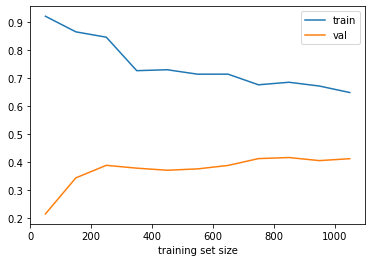

In [75]:
log_reg = LogisticRegression(random_state=0, max_iter=1000,penalty='l2',verbose=1, solver='liblinear')

plot_learning_curves(log_reg, X_train, y_train)

# Evaluate on test

In [76]:
# <<< solution
log_reg = LogisticRegression(random_state=0, max_iter=1000,penalty='l2',verbose=1, solver='liblinear').fit(X_train, y_train)
# >>>
yhat = log_reg.predict(X_test)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(y_test, yhat, average="macro")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

[LibLinear]Precision: 0.44210603031817425
Recall: 0.4414404664404665
F score: 0.42947668677363215


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (12, 12)

from sklearn.metrics import ConfusionMatrixDisplay

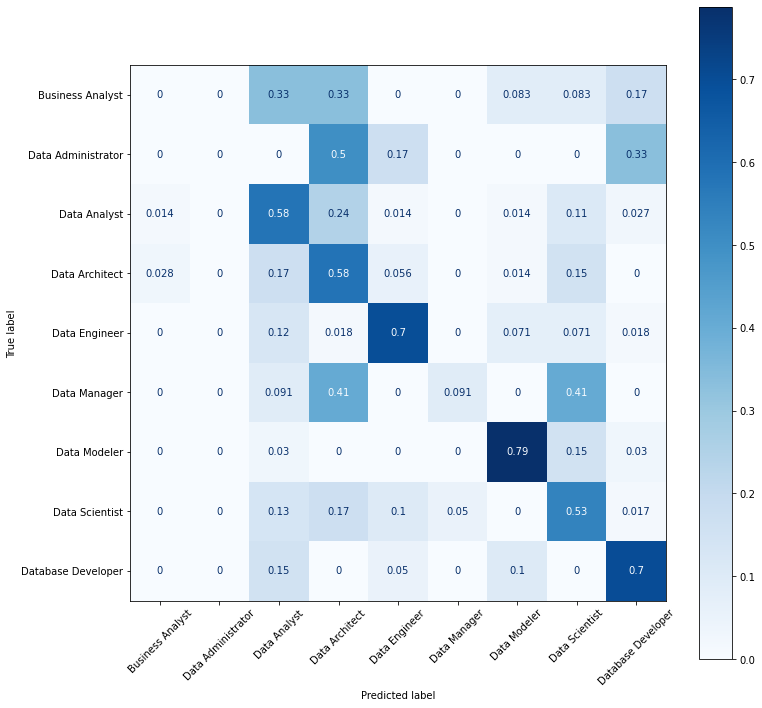

In [78]:
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test,
                                 display_labels=log_reg.classes_,
                                 xticks_rotation=45,
                                 cmap='Blues',
                                 normalize='true')

# Balance SMOTE

# random forest model


In [33]:
%time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

forest_reg = RandomForestClassifier(random_state=0)

# specify the hyperparameters and their values
# <<< solution
param_grid = [
    {'n_estimators': [30, 50, 100, 150, 200], 'max_depth': [None]},
]
# >>>

# we'll use 5-fold cross-validation
grid_search_RF = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 


grid_search_RF.fit(X_train, y_train)

CPU times: user 5 µs, sys: 7 µs, total: 12 µs
Wall time: 21 µs


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'max_depth': [None],
                          'n_estimators': [30, 50, 100, 150, 200]}],
             return_train_score=True, scoring='f1_macro')

In [35]:
val_scores = grid_search_RF.cv_results_["mean_test_score"]
train_scores = grid_search_RF.cv_results_["mean_train_score"]
params = [str(x) for x in grid_search_RF.cv_results_["params"]]

for val_score, train_score, param in sorted(zip(val_scores, train_scores, params), reverse=True):
    print(val_score, train_score, param)

0.42161782213432336 0.6772741038754942 {'max_depth': None, 'n_estimators': 100}
0.4192601387197842 0.6779590217729194 {'max_depth': None, 'n_estimators': 150}
0.41724233910536224 0.6774346939061827 {'max_depth': None, 'n_estimators': 200}
0.41440820528819905 0.6775357848545391 {'max_depth': None, 'n_estimators': 50}
0.4126856514002 0.6786655018661489 {'max_depth': None, 'n_estimators': 30}


In [23]:
%time
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

# specify the hyperparameters and their values
# <<< solution
param_grid = [
    {'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)},
]
# >>>

# we'll use 5-fold cross-validation
grid_search_nb = GridSearchCV(nb, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 


grid_search_nb.fit(X_train, y_train)

CPU times: user 4 µs, sys: 3 µs, total: 7 µs
Wall time: 11.9 µs


GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid=[{'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 1e-05)}],
             return_train_score=True, scoring='f1_macro')

In [24]:
val_scores = grid_search_nb.cv_results_["mean_test_score"]
train_scores = grid_search_nb.cv_results_["mean_train_score"]
params = [str(x) for x in grid_search_nb.cv_results_["params"]]

for val_score, train_score, param in sorted(zip(val_scores, train_scores, params), reverse=True):
    print(val_score, train_score, param)

0.402219955548491 0.6045510186830222 {'alpha': 0.001}
0.4012328377697658 0.5957685345062542 {'alpha': 0.01}
0.4008242756127519 0.608251672358043 {'alpha': 1e-05}
0.3996741760572178 0.5874349161208279 {'alpha': 0.1}
0.3995088738027797 0.6063852408192655 {'alpha': 0.0001}
0.3954922537320374 0.49868740784012006 {'alpha': 1}


In [20]:
from xgboost import XGBClassifier

/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
%time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

forest_reg = RandomForestClassifier(random_state=0)

# specify the hyperparameters and their values
# <<< solution
param_grid = [
    {'n_estimators': [30, 50, 100, 150, 200], 'max_depth': [None]},
]
# >>>

# we'll use 5-fold cross-validation
grid_search_RF = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 


grid_search_RF.fit(X_train, y_train)